Cargo todo

In [2]:
import pandas as pd
import numpy as np
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as pyoff
import plotly.graph_objs as go
from sklearn import preprocessing
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from scipy.stats import boxcox
from scipy.special import inv_boxcox
pd.set_option('display.max_row', 1000)
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

c:\Users\dolor\miniconda3\envs\prophet39\lib\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



Cargo los datos

In [3]:
serieScorr = pd.read_csv('serieScorr.csv', encoding= 'unicode_escape', delimiter=',')
# Convert Date to datetime
serieScorr['indice_tiempo'] = pd.to_datetime(serieScorr['indice_tiempo'])
serieScorr.tail(5)

,indice_tiempo,ventas_precios_corrientes
320,2022-09-01,232153.157225
321,2022-10-01,265665.688890
322,2022-11-01,284825.273120
323,2022-12-01,359730.267987
324,2023-01-01,316671.875716


renombramos para Prophet

In [4]:

serieScorr.columns = ['ds', 'y']
serieScorr.head(1)

,ds,y
0,1996-01-01,998.77


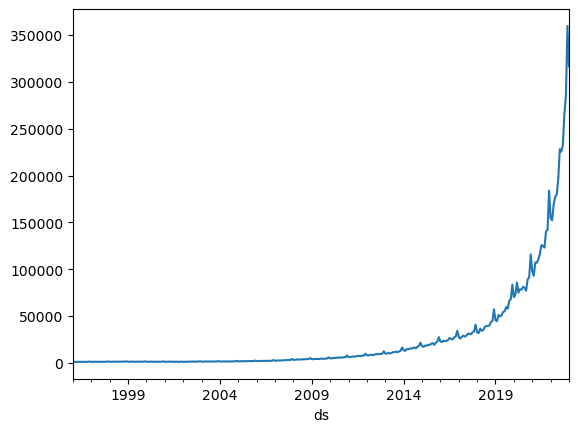

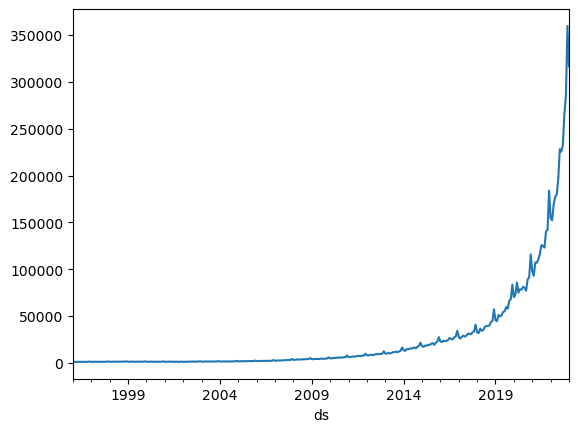

In [5]:
serieScorr.set_index('ds').y.plot().figure

aplicamos prophet m = Prophet(seasonality_mode='multiplicative').fit(serieScorr)

14:08:18 - cmdstanpy - INFO - Chain [1] start processing
14:08:21 - cmdstanpy - INFO - Chain [1] done processing


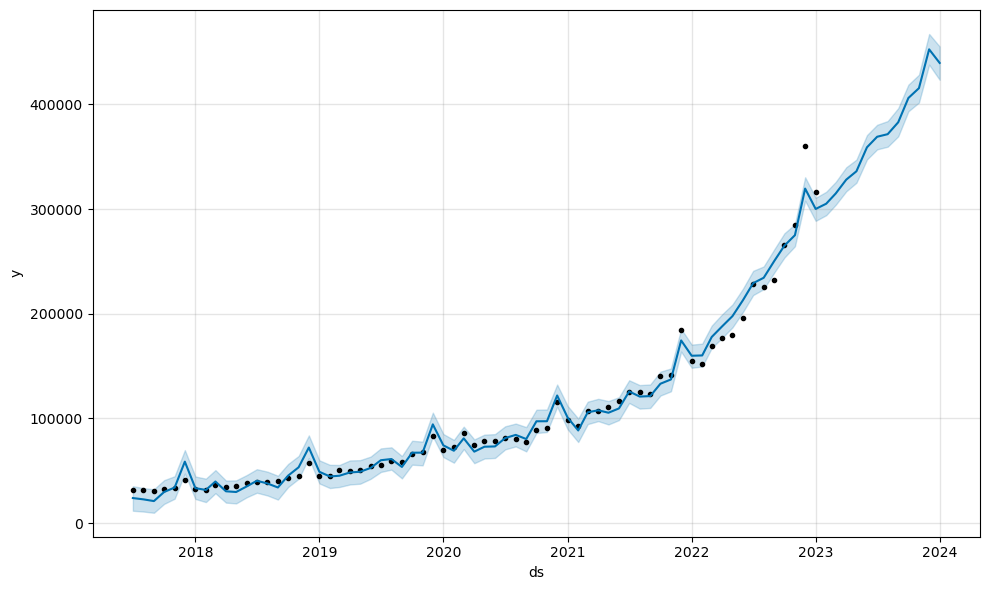

In [6]:
m=Prophet(weekly_seasonality=True)
fitted= m.fit(serieScorr.tail(67))
future = m.make_future_dataframe(periods=12, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

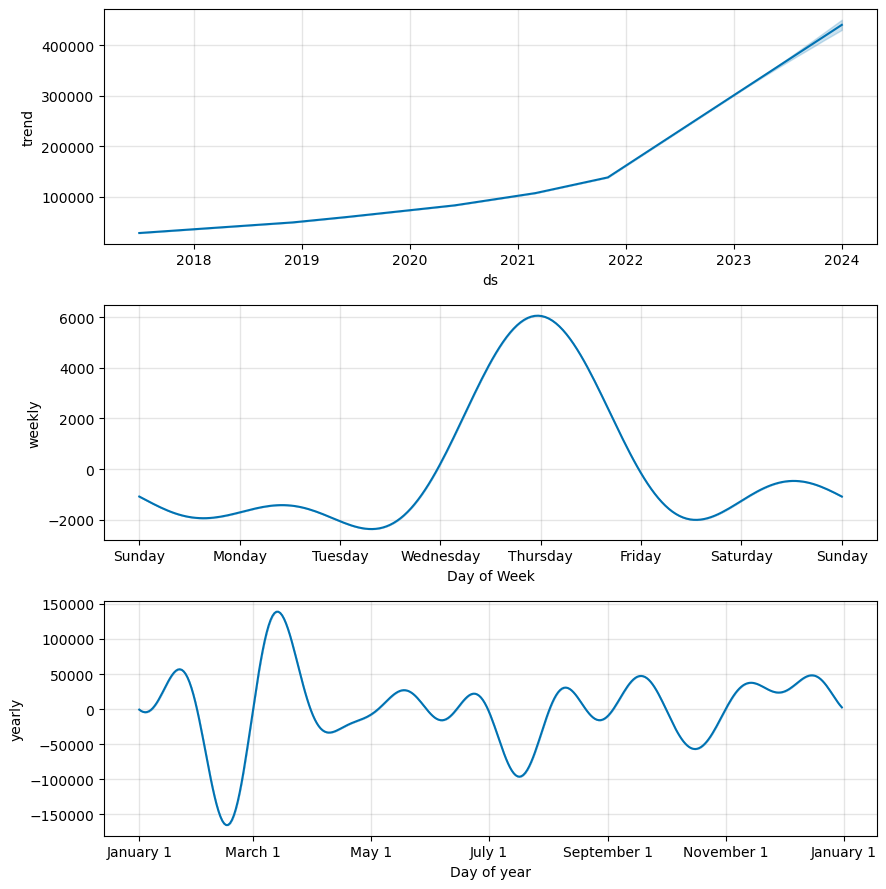

In [7]:
fig2 = m.plot_components(fcst)


In [8]:
fcst.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
67,2023-02-01,312493.180857,294077.085173,316419.718056,312364.682971,312625.292555,-7458.739224,-7458.739224,-7458.739224,215.094323,215.094323,215.094323,-7673.833547,-7673.833547,-7673.833547,0.0,0.0,0.0,305034.441633
68,2023-03-01,323188.080899,303980.239656,325831.022249,322699.877185,323653.902333,-8388.516465,-8388.516465,-8388.516465,215.094323,215.094323,215.094323,-8603.610788,-8603.610788,-8603.610788,0.0,0.0,0.0,314799.564434
69,2023-04-01,335028.863089,316863.637276,339821.576115,333939.169868,335995.181457,-6994.375101,-6994.375101,-6994.375101,-1250.594690,-1250.594690,-1250.594690,-5743.780411,-5743.780411,-5743.780411,0.0,0.0,0.0,328034.487988
70,2023-05-01,346487.684562,325070.918864,347164.888136,344742.862370,348244.233934,-10466.906250,-10466.906250,-10466.906250,-1707.951978,-1707.951978,-1707.951978,-8758.954272,-8758.954272,-8758.954272,0.0,0.0,0.0,336020.778312
71,2023-06-01,358328.466752,347270.484557,370563.025993,355932.212650,360815.812030,598.643966,598.643966,598.643966,6047.141348,6047.141348,6047.141348,-5448.497383,-5448.497383,-5448.497383,0.0,0.0,0.0,358927.110718
72,2023-07-01,369787.288226,356957.656748,380420.161555,366496.414741,373078.673730,-774.082188,-774.082188,-774.082188,-1250.594690,-1250.594690,-1250.594690,476.512502,476.512502,476.512502,0.0,0.0,0.0,369013.206038
73,2023-08-01,381628.070415,359490.181228,383995.683502,377373.934031,386007.322336,-10154.680392,-10154.680392,-10154.680392,-2055.628977,-2055.628977,-2055.628977,-8099.051415,-8099.051415,-8099.051415,0.0,0.0,0.0,371473.390024
74,2023-09-01,393468.852605,369353.030291,396283.743620,388091.940909,398838.878874,-10637.863975,-10637.863975,-10637.863975,-166.062511,-166.062511,-166.062511,-10471.801464,-10471.801464,-10471.801464,0.0,0.0,0.0,382830.988630
75,2023-10-01,404927.674079,393336.358554,418750.580486,398419.864145,411387.547219,1107.794767,1107.794767,1107.794767,-1081.997515,-1081.997515,-1081.997515,2189.792282,2189.792282,2189.792282,0.0,0.0,0.0,406035.468846
76,2023-11-01,416768.456269,401645.953975,428232.577482,409413.520811,424460.978838,-1363.876208,-1363.876208,-1363.876208,215.094323,215.094323,215.094323,-1578.970531,-1578.970531,-1578.970531,0.0,0.0,0.0,415404.580060


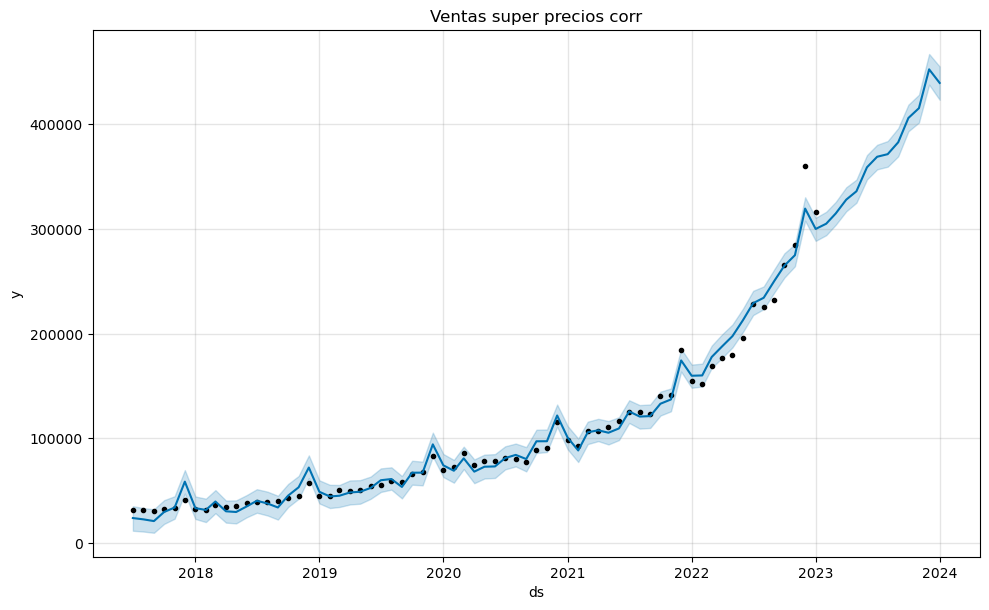

In [9]:
# Plot the graph of this data to get an understanding of how well forecast looks
m.plot(fcst);
plt.title("Ventas super precios corr")
plt.show()

In [10]:
cutoffs = pd.date_range(start='2018-01-01', end='2022-05-01', freq='2MS')
print(cutoffs)

DatetimeIndex(['2018-01-01', '2018-03-01', '2018-05-01', '2018-07-01',
               '2018-09-01', '2018-11-01', '2019-01-01', '2019-03-01',
               '2019-05-01', '2019-07-01', '2019-09-01', '2019-11-01',
               '2020-01-01', '2020-03-01', '2020-05-01', '2020-07-01',
               '2020-09-01', '2020-11-01', '2021-01-01', '2021-03-01',
               '2021-05-01', '2021-07-01', '2021-09-01', '2021-11-01',
               '2022-01-01', '2022-03-01', '2022-05-01'],
              dtype='datetime64[ns]', freq='2MS')


In [13]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model=m, horizon='31 days', cutoffs=cutoffs)
df_cv.head()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
14:11:06 - cmdstanpy - INFO - Chain [1] start processing
14:11:06 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 9/27 [02:40<05:20, 17.83s/it]
14:11:08 - cmdstanpy - INFO - Chain [1] start processing
14:11:08 - cmdstanpy - INFO - Chain [1] done processing
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
14:11:10 - cmdstanpy - INFO - Chain [1] done processing
14:11:11 - cmdstanpy - INFO - Chain [1] start processing
14:11:13 - cmdstanpy - INFO - Chain [1] done processing
14:11:15 - cmdstanpy - INFO - Chain [1] start processing
14:11:16 - cmdstanpy - INFO - Chain [1] done processing
14:11:17 - cmdstanpy - INFO - Chain [1] start processing
14:12:00 - cmdstanpy - INFO - Chain [1] done processing
14:12:01 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] done processing
14:12:06 - cmdstanpy - INFO - Chain [1] start processing
1

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-02-01,588629.496635,588629.496570,588629.496695,31736.824552,2018-01-01
1,2018-04-01,48036.464509,48036.464460,48036.464558,34113.745667,2018-03-01
2,2018-06-01,-290982.095974,-290982.096038,-290982.095911,38338.209746,2018-05-01
3,2018-08-01,212081.969687,212080.004995,212084.381472,39491.907274,2018-07-01
4,2018-10-01,-275604.248473,-275678.588620,-275531.292021,43420.253822,2018-09-01


In [15]:
df_cv.tail(5)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
22,2021-10-01,131850.726074,129319.979906,134487.302058,140487.487266,2021-09-01
23,2021-12-01,154649.449348,151870.767587,157419.007779,183983.151880,2021-11-01
24,2022-02-01,151574.596387,147194.023462,155781.695788,152202.573390,2022-01-01
25,2022-04-01,166005.824090,161760.799692,170151.453571,177192.288724,2022-03-01
26,2022-06-01,183606.834154,179756.542912,187860.417530,196114.524817,2022-05-01


In [16]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
print(df_p)

  horizon           mse           rmse           mae      mape     mdape  \
0 30 days  1.313577e+10  114611.377478  54461.544691  1.069913  0.112329   
1 31 days  2.372547e+10  154030.734579  64248.437112  1.736405  0.085291   

      smape  coverage  
0  0.440043  0.000000  
1  0.406915  0.052632  


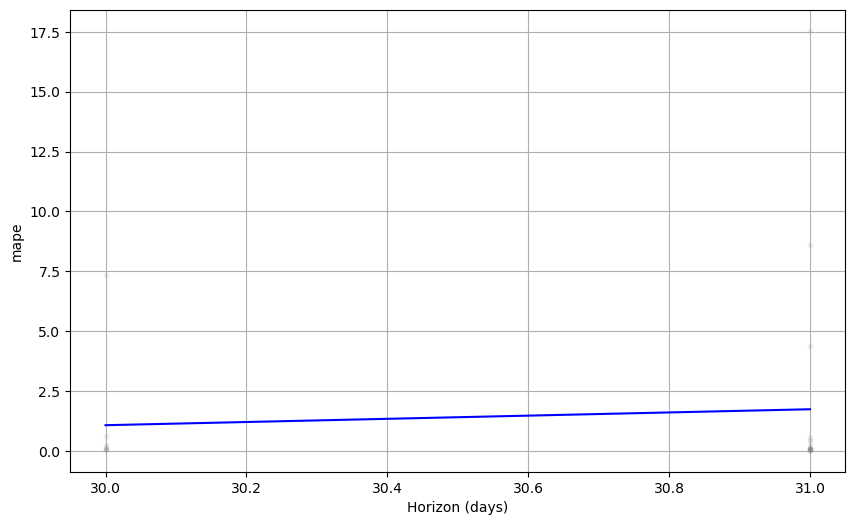

In [17]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


C:\Users\dolor\AppData\Local\Temp\ipykernel_19200\4026366797.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



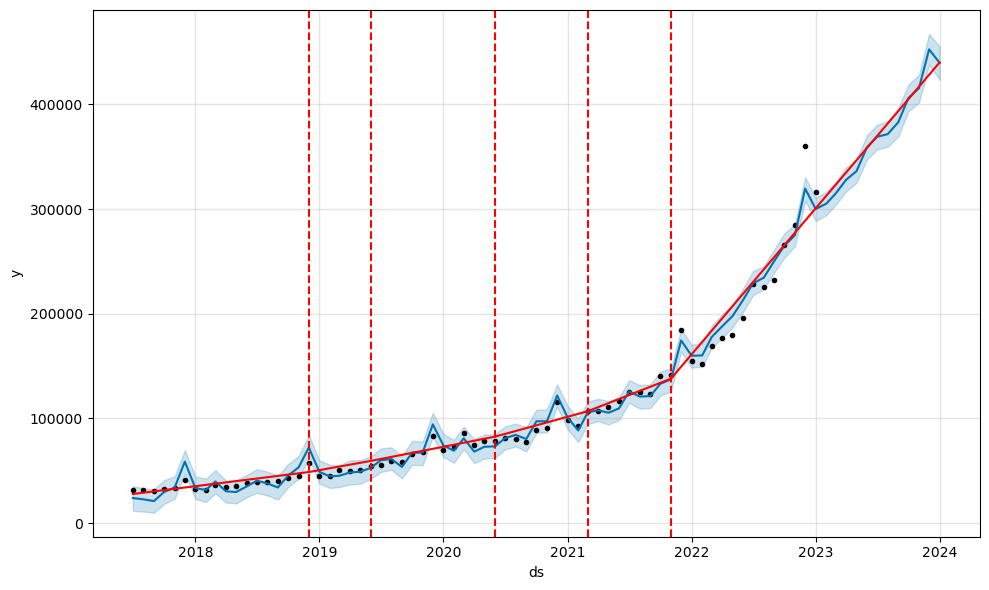

In [18]:
# Plotting with Prophet built-in method
fig = m.plot(fcst)
#ax = fig.add_subplot(111)
#ax.axvline(x=fcst['ds'].max() - pd.Timedelta('180 days'), c='red', lw=2, alpha=0.5, ls='--')
a = add_changepoints_to_plot(fig.gca(), m, fcst)
fig.show()

In [19]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
67,2023-02-01,305034.441633,294077.085173,316419.718056
68,2023-03-01,314799.564434,303980.239656,325831.022249
69,2023-04-01,328034.487988,316863.637276,339821.576115
70,2023-05-01,336020.778312,325070.918864,347164.888136
71,2023-06-01,358927.110718,347270.484557,370563.025993
72,2023-07-01,369013.206038,356957.656748,380420.161555
73,2023-08-01,371473.390024,359490.181228,383995.683502
74,2023-09-01,382830.988630,369353.030291,396283.743620
75,2023-10-01,406035.468846,393336.358554,418750.580486
76,2023-11-01,415404.580060,401645.953975,428232.577482
